<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Visualization with Matplotlib](04.00-Introduction-To-Matplotlib.ipynb) | [Contents](Index.ipynb) | [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb) >

# Simple Line Plots

Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.

We'll start by setting up the notebook for plotting and importing the packages we will use:

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

For all Matplotlib plots, we start by creating a figure and an axes.
In their simplest form, a figure and axes can be created as follows:

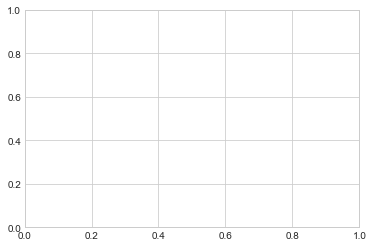

In [20]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the *figure* (an instance of the class ``plt.Figure``) can be thought of as **a single container** that contains all the objects representing axes, graphics, text, and labels.

The *axes* (an instance of the class ``plt.Axes``) is what we see above: 
- a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.
    - ``fig`` refers to a figure instance, and 
    - ``ax`` refers to an axes instance or group of axes instances.

Once we have created an axes, we can use the ``ax.plot`` function to plot some data. Let's start with a simple sinusoid:

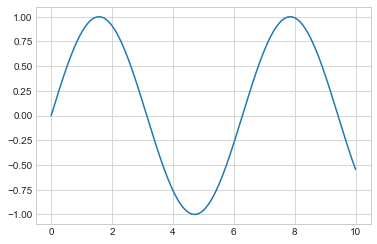

In [3]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

Alternatively, we can use the pylab interface and let the figure and axes be created for us in the background
(see [Two Interfaces for the Price of One](04.00-Introduction-To-Matplotlib.ipynb#Two-Interfaces-for-the-Price-of-One) for a discussion of these two interfaces):

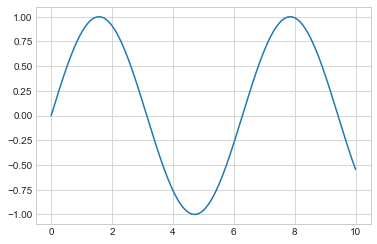

In [4]:
plt.plot(x, np.sin(x));

If we want to create a single figure with multiple lines, we can simply call the ``plot`` function multiple times:

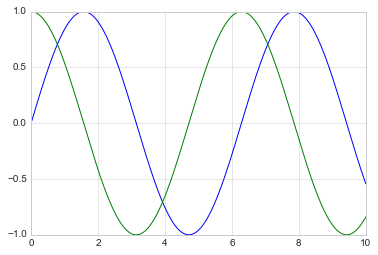

In [5]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

That's all there is to plotting simple functions in Matplotlib!
We'll now dive into some more details about how to control the appearance of the axes and lines.

## Adjusting the Plot: Line Colors and Styles

The ``plt.plot()`` function takes additional arguments that can be used to specify these.
- To adjust the color, you can use the ``color`` keyword

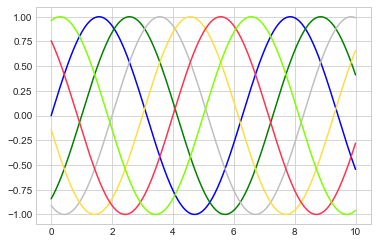

In [5]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

- the line style can be adjusted using the ``linestyle`` keyword:

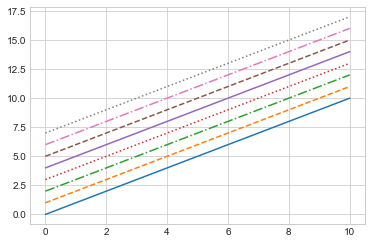

In [6]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

``linestyle`` and ``color`` codes can be combined into a single non-keyword argument to the ``plt.plot()`` function:

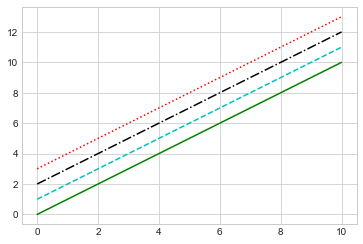

In [7]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

These single-character color codes reflect the standard abbreviations in the 
- RGB (Red/Green/Blue) color system
- CMYK (Cyan/Magenta/Yellow/blacK) color system

Viewing the docstring of the ``plt.plot()`` function using IPython's help tools (See [Help and Documentation in IPython](01.01-Help-And-Documentation.ipynb)).

In [11]:
plt.plot?

## Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

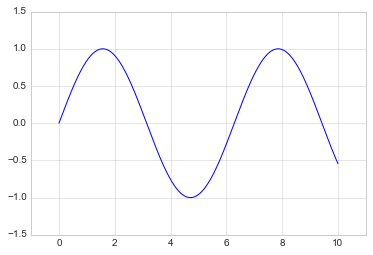

In [9]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

If you'd like axis to be displayed in reverse, you can simply reverse the order of the arguments:

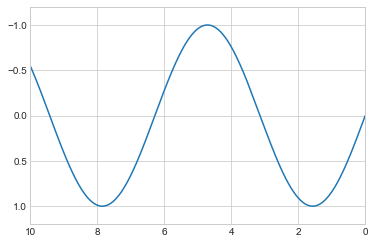

In [21]:
plt.plot(x, np.sin(x))
plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

A useful related method is ``plt.axis()`` (note here the potential confusion between *axes* ).

The ``plt.axis()`` method
- sets the ``x`` and ``y`` limits 
- passes a list which specifies ``[xmin, xmax, ymin, ymax]``:

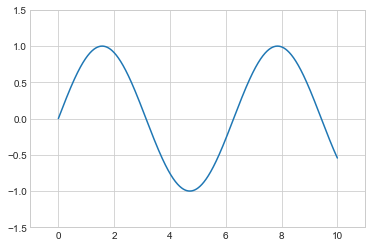

In [13]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

The ``plt.axis()`` method goes even beyond this, allowing you to do things like automatically tighten the bounds around the current plot:

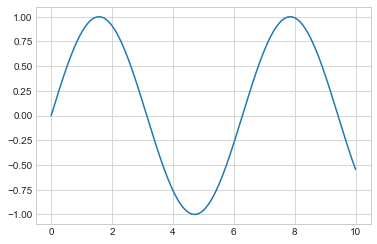

In [12]:
plt.plot(x, np.sin(x))
plt.axis('tight');

It allows even higher-level specifications, 
- such as ensuring an `equal` aspect ratio 
    - to make one unit in ``x`` is equal to one unit in ``y``:

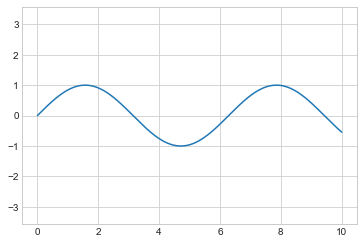

In [14]:
plt.plot(x, np.sin(x))
plt.axis('equal');

For more information on axis limits and the other capabilities of the ``plt.axis`` method, refer to the ``plt.axis`` docstring.

In [22]:
plt.axis?

## Labeling Plots

As the last piece of this section, we'll briefly look at the labeling of plots: titles, axis labels, and simple legends.

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:

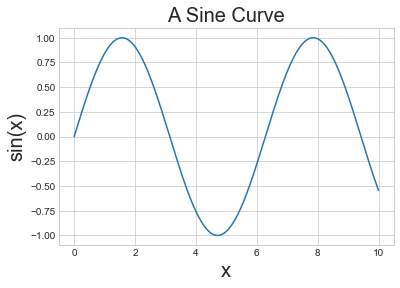

In [23]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve", fontsize = 20)
plt.xlabel("x", fontsize = 20)
plt.ylabel("sin(x)", fontsize = 20);

The position, size, and style of these labels can be adjusted using optional arguments to the function.
- see the Matplotlib documentation 
- check the docstrings of each of these functions.

When multiple lines are being shown within a single axes, it can be useful to create a plot `legend that labels` each line type.
- ``plt.legend()``
- it is easiest to specify the label of each line using the ``label`` keyword 

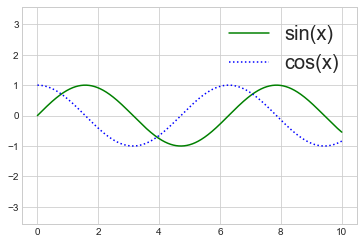

In [25]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend(fontsize = 20);

As you can see, the ``plt.legend()`` function keeps track of the line style and color, and matches these with the correct label.

More information
- Check the ``plt.legend`` docstring; 
- [Customizing Plot Legends](04.06-Customizing-Legends.ipynb).

## Aside: Matplotlib Gotchas

While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

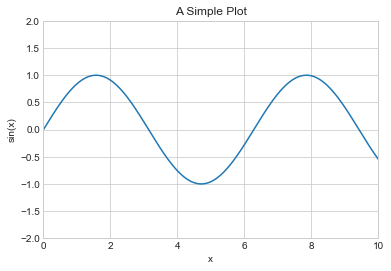

In [18]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

<!--NAVIGATION-->
< [Visualization with Matplotlib](04.00-Introduction-To-Matplotlib.ipynb) | [Contents](Index.ipynb) | [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb) >